In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
plt.style.use('dark_background')

Using a dataset of biomedical voice measurements in patients suffering from Parkinson's disease to predict patients' Unified Parkinson's Disease Rating Scale scores (UPDRS).

In [20]:
X = pd.read_csv('parkinsons_updrs.data').drop(['sex','subject#','motor_UPDRS'],axis=1)
y = X.pop('total_UPDRS')

columns = X.columns
print(X.shape)
X.head(5)

(5875, 18)


,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Scaler = StandardScaler()
X_train = pd.DataFrame(Scaler.fit_transform(X_train),columns=columns)
X_test  = pd.DataFrame(Scaler.transform(X_test),columns=columns)

reg = LinearRegression()
model = reg.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(f'Training Set MSE:\n\t {mean_squared_error(y_train, y_train_pred)}')
print(f'Test Set MSE:\n\t {mean_squared_error(y_test, y_test_pred)}')

Training Set MSE:
	 95.4119870244626
Test Set MSE:
	 96.54223890643843


### b)	
Check for overfitting. Is there overfitting? Support your answer with some results you generated. 

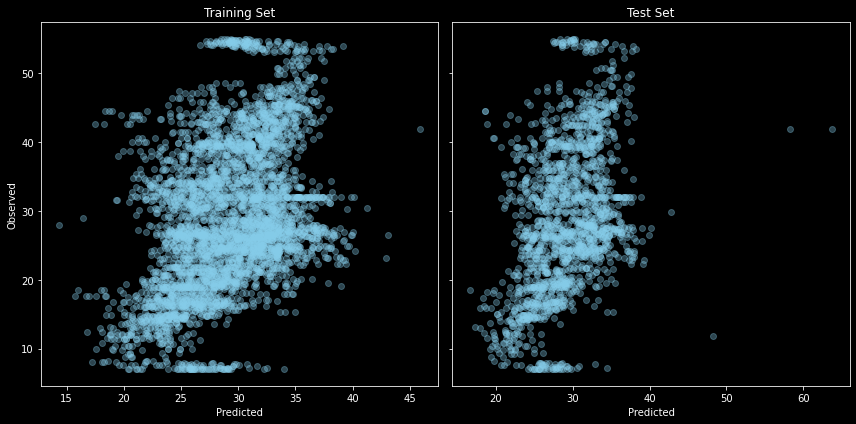

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6),sharey=True)

p1 = sns.regplot(x=y_train_pred,
                 y=y_train,
                 fit_reg=False,
                 color='skyblue',
                 scatter_kws = {'alpha' : 1/3},
                 ax=ax1)

p2 = sns.regplot(x=y_test_pred,
                 y=y_test,
                 fit_reg=False,
                 color='skyblue',
                 scatter_kws = {'alpha' : 1/3},
                 ax=ax2)

ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')

p1.set(xlabel='Predicted',ylabel='Observed')
p2.set(xlabel='Predicted',ylabel='')

fig.tight_layout()
plt.show()

> The MSE was about the same on the test set and the training set, indicating that overfitting. Looking at the plots of predicted UPDRS vs observed, we see similar performance on both the train and test sets.

### c)	
Fit a lasso regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [14]:
lasso = Lasso() # Default alpha is 1
model = lasso.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(f'Training Set MSE:\n\t {mean_squared_error(y_train, y_train_pred)}')
print(f'Test Set MSE:\n\t {mean_squared_error(y_test, y_test_pred)}')

Training Set MSE:
	 102.4086335464908
Test Set MSE:
	 104.01038393338271


### d)	
Fit a ridge regression on the data and check the training and test accuracy of the model. Use the default alpha or penalty constant. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html 

In [15]:
ridge = Ridge() # Default alpha is 1
model = ridge.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(f'Training Set MSE:\n\t {mean_squared_error(y_train, y_train_pred)}')
print(f'Test Set MSE:\n\t {mean_squared_error(y_test, y_test_pred)}')

Training Set MSE:
	 95.45746332606262
Test Set MSE:
	 96.38416979715424


### e)	
Which model is better, OLS, Lasso, or Ridge regression? 

> The ridge and OLS regression performed the best, both having MSEs of ~95 on the training set and ~96 on the test set. This was better than the lasso regression performed worse, with the MSE being ~102 on the training set and ~104 on the test set.

### d)	
Tune the alpha hyperparameters of the lasso and ridge regression using any tuning technique of your choice? What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?
Write your answer here

In [16]:
parameters = {'alpha':[a/10 for a in range(1,101)]}

lasso      = Lasso()
lasso_grid = GridSearchCV(lasso,parameters,cv=10)
lasso_results = lasso_grid.fit(X_train,y_train)

ridge      = Ridge()
ridge_grid = GridSearchCV(ridge,parameters,cv=10)
ridge_results = ridge_grid.fit(X_train,y_train)

In [17]:
print(f'Lasso Regression:\n\t{lasso_results.best_params_}')
print(f'Ridge Regression:\n\t{ridge_results.best_params_}')

Lasso Regression:
	{'alpha': 0.1}
Ridge Regression:
	{'alpha': 10.0}


In [18]:
lasso = Lasso(alpha=0.1)
model = lasso.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(f'Training Set MSE:\n\t {mean_squared_error(y_train, y_train_pred)}')
print(f'Test Set MSE:\n\t {mean_squared_error(y_test, y_test_pred)}')

Training Set MSE:
	 96.42092751084131
Test Set MSE:
	 96.54966252332837


In [19]:
ridge = Ridge(alpha=10)
model = ridge.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

print(f'Training Set MSE:\n\t {mean_squared_error(y_train, y_train_pred)}')
print(f'Test Set MSE:\n\t {mean_squared_error(y_test, y_test_pred)}')

Training Set MSE:
	 95.47070109731311
Test Set MSE:
	 96.28046296698002


> For the ridge regression, the optimal alpha was 10, though this did not noticibly improve the MSE. The lasso regression had an optimal alpha of 0.1. Changing this parameter improved the MSE to be comparable to the OLS and ridge regressions.